# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, March 22, 2017

## k-Nearest Neighbour - The Lazy Learner

The task for this homework is again that of handwritten digit recognition on the MNIST dataset. From the huge corpus of 70k images, I have sampled 3k images uniformly i.e. there are 300 images in each class.

I have split the 3k samples into training set (2500 points) and test set (500 points) randomly. This experimental dataset is the same for all and I have provided the pickle files with the corresponding data.

In this homework, you will be experimenting with different distance functions and $k$. No complicated (or simple, for some) coding involved. Only play with the distance function and $k$.

Conduct your experiments in a principled way to decide the best distance function according to you and the optimal value of $k$ for the best distance function. Use the accuracy score as the evaluation metric.

Explain your approach clearly in the write-up.

Report your experiment results using plots (preferably) or tables with the accuracies in the write-up.

(EXTRA CREDITS) Come up with your own distance function, explain it clearly and provide the results from your distance function.

In [5]:
import numpy as np
import pickle
import random
import pandas as pd
import scipy.spatial.distance

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
np.random.seed(1234)

## 1. Data Preparation

In [7]:
training_data = pickle.load(open('training_data_hw4.p', 'rb'))
training_labels = pickle.load(open('training_labels_hw4.p', 'rb'))

test_data = pickle.load(open('test_data_hw4.p', 'rb'))
test_labels = pickle.load(open('test_labels_hw4.p', 'rb'))


print ('Training Data: ', training_data.shape)
print ('Test Data: ', test_data.shape)

print ('Training Label Distribution: ', np.bincount(training_labels))
print ('Test Label Distribution: ', np.bincount(test_labels))

('Training Data: ', (2500, 784))
('Test Data: ', (500, 784))
('Training Label Distribution: ', array([249, 253, 253, 246, 249, 248, 245, 244, 261, 252]))
('Test Label Distribution: ', array([51, 47, 47, 54, 51, 52, 55, 56, 39, 48]))


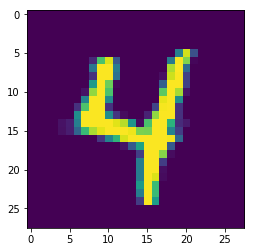

In [8]:
plt.imshow(training_data[100].reshape((28, 28)))

## 2. Model Definition

In [9]:
def knn_classify(x_, x, y, metric='euclidean', k=1):
    if len(x_.shape) < 2:
        x_ = x_.reshape([1,-1])
        
    dists = scipy.spatial.distance.cdist(x_, x, metric)
    
    sidx = np.argpartition(dists, k, axis=1)[:,:k]
    
    y_ = np.zeros(len(x_))
    for ii, xx_ in enumerate(x_):
        yy_, yc_ = np.unique(y[sidx[ii,:]], return_counts=True)
        y_[ii] = yy_[np.argmax(yc_)]
        
    return y_

## 3. Modeling - Play Area - Experiment with different distance functions and k

In [10]:
k = 5
metric = 'seuclidean'

tra_acc = np.sum(knn_classify(training_data, training_data, training_labels, metric, k) == training_labels) / np.float(len(training_labels))
tes_acc = np.sum(knn_classify(test_data, training_data, training_labels, metric, k) == test_labels) / np.float(len(test_labels))

print 'Training accuracy {}, Test accuracy {}'.format(tra_acc, tes_acc)

Training accuracy 0.1012, Test accuracy 0.094


## 4. Testing

In [12]:
# REPORT THE TEST ACCURACY USING YOUR EXPERIMENTAL SETUP

functions = ["braycurtis", "canberra", "chebyshev", "cityblock", "correlation", "cosine", "dice", "euclidean", "hamming", "jaccard", "kulsinski", "matching", "minkowski", "rogerstanimoto", "russellrao", "seuclidean", "sokalmichener", "sokalsneath", "sqeuclidean", "yule"]

max_val = 0
max_func = ""
k = 1

for func in functions:
    tes_acc = np.sum(knn_classify(test_data, training_data, training_labels, func, k) == test_labels) / np.float(len(test_labels))
    if(tes_acc > max_val):
        max_val = tes_acc
        max_fun = func

In [26]:
max_val = 0
max_k = 0
for k in xrange(1, 10):
    tes_acc = np.sum(knn_classify(test_data, training_data, training_labels, max_fun, k) == test_labels) / np.float(len(test_labels))
    if(tes_acc > max_val):
        max_val = tes_acc
        max_k = k

acc = dict()
for k in xrange(1, 2000):
    acc[k] = np.sum(knn_classify(test_data, training_data, training_labels, max_fun, k) == test_labels) / np.float(len(test_labels))
    

{1: 0.94599999999999995, 2: 0.94599999999999995, 3: 0.93799999999999994, 4: 0.94599999999999995, 5: 0.94199999999999995, 6: 0.93400000000000005, 7: 0.93000000000000005, 8: 0.93000000000000005, 9: 0.92600000000000005, 10: 0.92200000000000004, 11: 0.92600000000000005, 12: 0.92200000000000004, 13: 0.92200000000000004, 14: 0.92600000000000005, 15: 0.91800000000000004, 16: 0.91400000000000003, 17: 0.90800000000000003, 18: 0.90600000000000003, 19: 0.90000000000000002, 20: 0.90400000000000003, 21: 0.90600000000000003, 22: 0.90800000000000003, 23: 0.90000000000000002, 24: 0.90400000000000003, 25: 0.90000000000000002, 26: 0.90000000000000002, 27: 0.90000000000000002, 28: 0.90200000000000002, 29: 0.90200000000000002, 30: 0.90000000000000002, 31: 0.90400000000000003, 32: 0.90000000000000002, 33: 0.90200000000000002, 34: 0.89800000000000002, 35: 0.89600000000000002, 36: 0.90000000000000002, 37: 0.90000000000000002, 38: 0.90200000000000002, 39: 0.89400000000000002, 40: 0.89400000000000002, 41: 0.89

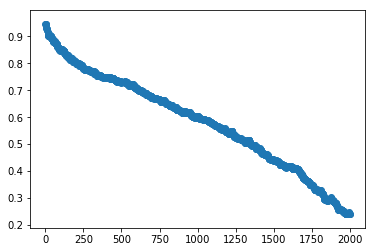

In [27]:
print(acc)
plt.scatter(acc.keys(), acc.values())
plt.show()

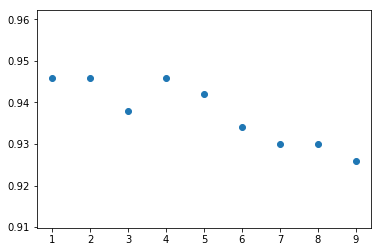

In [28]:
acc = dict()
for k in xrange(1, 10):
    acc[k] = np.sum(knn_classify(test_data, training_data, training_labels, max_fun, k) == test_labels) / np.float(len(test_labels))
plt.scatter(acc.keys(), acc.values())
plt.show()